### Lista 01
##### Aluno:  Leodécio Braz <br /> Matricula: 377594

In [4]:
%matplotlib inline
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from sklearn import linear_model, metrics, cross_validation
import numpy as np
import pandas as pd
import seaborn as sns

# Questão 1

In [5]:
X, y = ds.load_diabetes(return_X_y=True)


In [6]:
print (X.shape,y.shape)

(442, 10) (442,)


In [7]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [8]:
X_dframe = pd.DataFrame(X)

In [9]:
X_dframe.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
y_dframe = pd.DataFrame(y)

In [11]:
y_dframe.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [13]:
dframe = pd.concat([X_dframe,y_dframe], axis=1)

In [14]:
feature_cols =  ['A','B','C','D','E','F','G','H','I','J','K']
dframe.columns = feature_cols

In [15]:
dframe.head()

,A,B,C,D,E,F,G,H,I,J,K
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
X_values = dframe[['A','B','C','D','E','F','G','H','I','J']]
y_values = dframe['K']

# Questão 2

In [17]:
dframe.corr()

,A,B,C,D,E,F,G,H,I,J,K
A,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
B,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
C,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
D,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
E,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
F,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
G,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
H,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
I,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
J,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


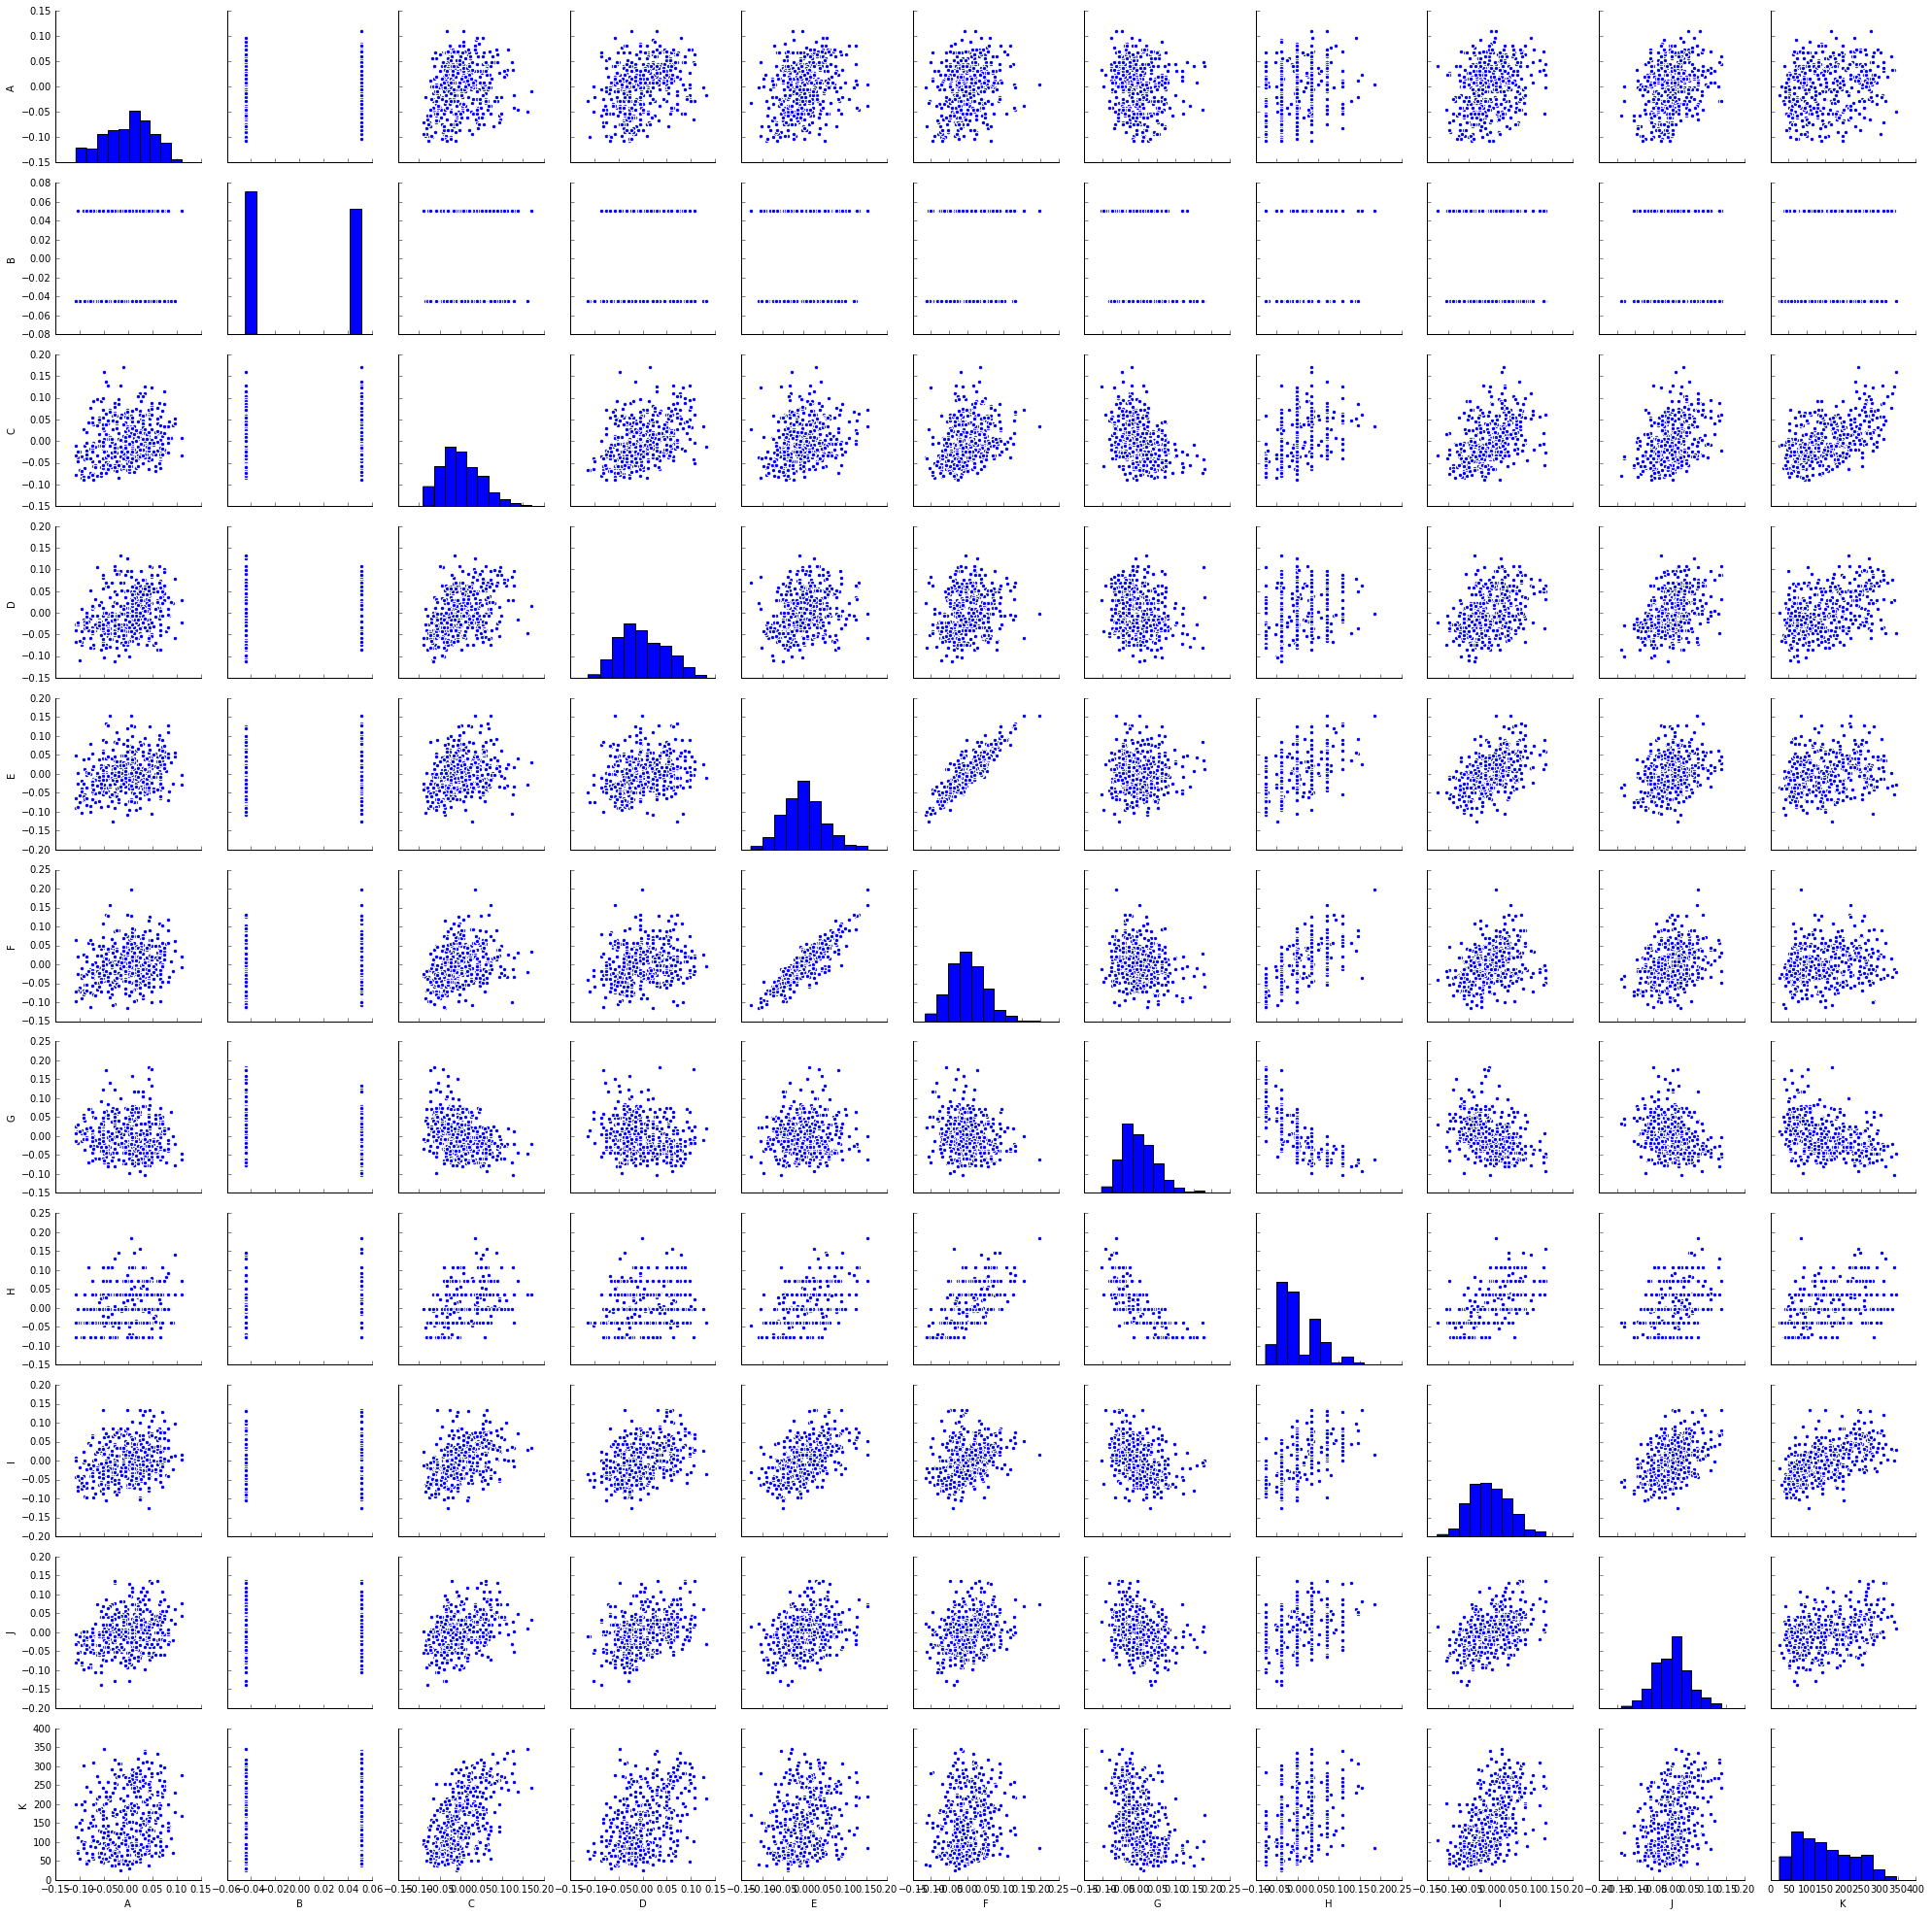

In [18]:
sns.pairplot(dframe)

#### a)   A feature que mais se ajusta a uma função linear é a 'E' pois apresentar um alinhamento crescente mais destacável entre os pontos.

#### b) A  feature  que pior se ajusta a uma função linear a 'G' não apresentando um alinhamento padrão.

# questão 3

In [19]:
for i in feature_cols[0:len(feature_cols)-1]:
    print(i + ' -> K: ' + str(dframe[i].corr(dframe['K'])))
    

A -> K: 0.187888750719
B -> K: 0.0430619984516
C -> K: 0.586450134475
D -> K: 0.441483848931
E -> K: 0.212022481015
F -> K: 0.174053586969
G -> K: -0.394789250671
H -> K: 0.430452884745
I -> K: 0.565883425243
J -> K: 0.382483484249


# Questão 4

In [20]:
linReg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_values, y_values, random_state=1)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(331, 10)
(331,)
(111, 10)
(111,)


In [22]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Questão 5

In [23]:
print(linReg.intercept_)
print(linReg.coef_)

150.997693786
[  -7.85951708 -245.05253542  575.11667591  323.85372717 -519.77447335
  250.61132753    0.96367294  180.50891964  614.75959394   52.10619986]


In [24]:
mult = ['','X1','X2','X3','X4','X5','X6','X7','X8','X9']
for i in range(0,len(linReg.coef_)):
    print(str(linReg.coef_[i]) + ' ' + mult[i] + ' +'),

-7.85951707604  +
-245.05253542 X1 +
575.116675905 X2 +
323.853727169 X3 +
-519.774473346 X4 +
250.611327529 X5 +
0.963672944171 X6 +
180.508919635 X7 +
614.759593942 X8 +
52.1061998644 X9 +


# Questão 6

In [27]:
y_pred = linReg.predict(X_test)

# Questão 7

In [28]:
mse = metrics.mean_squared_error(y_test,y_pred)
print (mse)

2903.10000132


In [29]:
mse_braco = np.sum((y_test - y_pred) ** 2) / len(y_test)
print(mse_braco)

2903.1000013228004


# Questão 8

In [186]:
feature_cols = ['E']
X_better = dframe[feature_cols]
X_train_better, X_test_better, y_train_better, y_test_better = cross_validation.train_test_split(X_better, y_values, random_state=1)

In [187]:
linReg_better = linear_model.LinearRegression()
linReg_better.fit(X_train_better,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
y_pred_better = linReg_better.predict(X_test_better)

### Coeficientes da função linear de forma manual

In [230]:
y_ = [[i] for i in y_test_better]

In [231]:
# B1
b1 = np.sum((X_test_better - np.mean(X_test_better)) * (y_ - np.mean(y_))) / np.sum((X_test_better - np.mean(X_test_better)) ** 2)  
b1

E    377.836795
dtype: float64

In [232]:
# B0
b0 = np.mean(y_) - b1 * np.mean(X_test_better)
b0

E    148.622985
dtype: float64

### Coeficientes da função linear de forma automatizada

In [233]:
# B0
linReg_better.intercept_

153.35316995849809

In [234]:
# B1
linReg_better.coef_

array([ 331.32978537])

### gráfico de dispersão

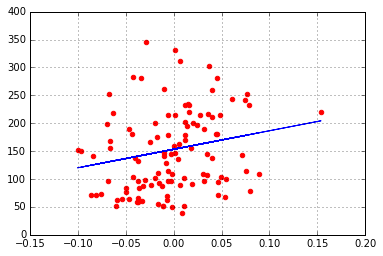

In [238]:
plt.grid()
plt.scatter(X_test_better, y_test_better, color='red')
plt.plot(X_test_better, y_pred_better)

#plt.plot(X_test_better,y_test,'o')

### MSE

In [239]:
mse = metrics.mean_squared_error(y_test_better,y_pred_better)
print (mse)

4959.93597506


# Questão 9

In [240]:
feature_cols = ['G']
X_worst = dframe[feature_cols]
X_train_worst, X_test_worst, y_train_worst, y_test_worst = cross_validation.train_test_split(X_worst, y_values, random_state=1)

In [241]:
linReg_worst = linear_model.LinearRegression()
linReg_worst.fit(X_train_worst,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [242]:
y_pred_worst = linReg_worst.predict(X_test_worst)

### Coeficientes da função linear

In [243]:
# B0
linReg_worst.intercept_

153.26367030273306

In [244]:
# B1
linReg_worst.coef_

array([-698.00267819])

### Gráfico de dispersão

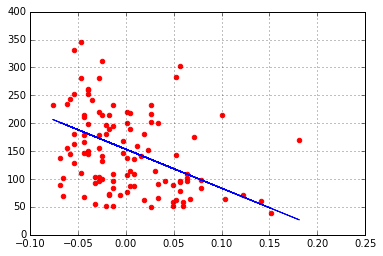

In [245]:
plt.grid()
plt.scatter(X_test_worst, y_test_worst, color='red')
plt.plot(X_test_worst, y_pred_worst)

### MSE

In [246]:
mse = metrics.mean_squared_error(y_test_worst,y_pred_worst)
print (mse)

4729.79010662
